In [1]:
import os
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
base_dir = "C://DATA//train//49_kaggle//KaggleFun//Sales//DATA"
cat = pd.read_csv(os.path.join(base_dir, "item_categories.csv"))
item = pd.read_csv(os.path.join(base_dir,'items.csv'))
sales = pd.read_csv(os.path.join(base_dir, 'sales_train.csv'))
shops = pd.read_csv(os.path.join(base_dir, 'shops.csv'))
item = item.drop(["item_name"], axis=1)
sales = sales[sales["item_cnt_day"] < 1001]
sales = sales[sales["item_price"] < 20000]
sales = sales.drop_duplicates(keep='first')

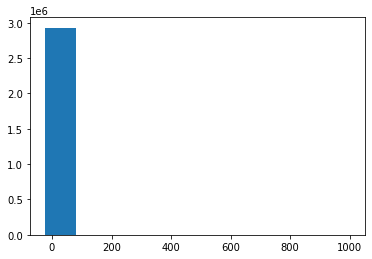

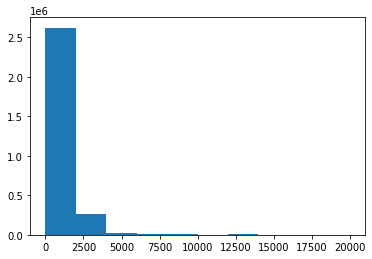

In [2]:
plt.hist(sales["item_cnt_day"])
plt.show()
plt.hist(sales["item_price"])
plt.show()

In [3]:
price_ds = sales.pivot_table(index = ['shop_id','item_id'],values = ["item_price"], columns = ['date_block_num'],aggfunc=np.mean)
price_ds.reset_index(inplace = True)
price_ds = price_ds.set_index(["item_id", "shop_id"])
price_ds.columns = [col[0] + "_" + str(col[1]) for col in price_ds.columns.values]
price_ds.tail(50)

,,item_price_0,item_price_1,item_price_2,item_price_3,item_price_4,item_price_5,item_price_6,item_price_7,item_price_8,item_price_9,item_price_10,item_price_11,item_price_12,item_price_13,item_price_14,item_price_15,item_price_16,item_price_17,item_price_18,item_price_19,item_price_20,item_price_21,item_price_22,item_price_23,item_price_24,item_price_25,item_price_26,item_price_27,item_price_28,item_price_29,item_price_30,item_price_31,item_price_32,item_price_33
item_id,shop_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22024,59,NaN,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22025,59,NaN,NaN,NaN,NaN,NaN,NaN,299.0,NaN,299.0000,299.0,NaN,NaN,149.0,99.33,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22026,59,NaN,NaN,NaN,NaN,NaN,399.0,399.0,399.0,NaN,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22027,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0000,NaN,NaN,149.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22040,59,NaN,NaN,149.000,NaN,NaN,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22041,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22042,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22043,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0000,149.0,NaN,NaN,NaN,NaN,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,NaN
22045,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
price_mean = pd.DataFrame(price_ds.mean(axis=1), columns=["mean"])
price_max = pd.DataFrame(price_ds.max(axis=1), columns=["max"])
price = pd.merge(price_mean, price_max, on = ["item_id", "shop_id"])
price.tail(50)

,,mean,max
item_id,shop_id,,
22024,59,149.000000,149.00
22025,59,215.721667,299.00
22026,59,399.000000,399.00
22027,59,149.000000,149.00
22040,59,149.000000,149.00
22041,59,449.380000,449.38
22042,59,399.000000,399.00
22043,59,149.000000,149.00
22045,59,399.000000,399.00


In [5]:
test_price = pd.merge(sales, price_max, on=["item_id", "shop_id"], how="left")
test_price["discount"] = 1 - test_price["item_price"] / test_price["max"]
test_price.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,max,discount
0,02.01.2013,0,59,22154,999.00,1.0,999.00,0.000000
1,03.01.2013,0,25,2552,899.00,1.0,899.00,0.000000
2,05.01.2013,0,25,2552,899.00,-1.0,899.00,0.000000
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05,0.000000
4,15.01.2013,0,25,2555,1099.00,1.0,1149.00,0.043516
5,10.01.2013,0,25,2564,349.00,1.0,349.00,0.000000
6,02.01.2013,0,25,2565,549.00,1.0,549.00,0.000000
7,04.01.2013,0,25,2572,239.00,1.0,299.00,0.200669
8,11.01.2013,0,25,2572,299.00,1.0,299.00,0.000000
9,03.01.2013,0,25,2573,299.00,3.0,299.00,0.000000


In [6]:
ds = sales.pivot_table(index = ['shop_id','item_id'], values = ['item_cnt_day'], columns = ['date_block_num'], fill_value = 0,aggfunc='sum')
ds = ds.reset_index()
ds.columns = ["_".join(str(e).strip() for e in list(col) if len(str(e)) > 0) for col in ds.columns.values]
ds.head()

,shop_id,item_id,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,item_cnt_day_7,item_cnt_day_8,item_cnt_day_9,item_cnt_day_10,item_cnt_day_11,item_cnt_day_12,item_cnt_day_13,item_cnt_day_14,item_cnt_day_15,item_cnt_day_16,item_cnt_day_17,item_cnt_day_18,item_cnt_day_19,item_cnt_day_20,item_cnt_day_21,item_cnt_day_22,item_cnt_day_23,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
0,0,30,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
price_time = test_price.pivot_table(index = ['shop_id','item_id'], values = ["discount"], columns = ['date_block_num'],aggfunc=np.mean)
price_time.reset_index(inplace = True)
price_time = price_time.set_index(["item_id", "shop_id"])
price_time.columns = ["_".join(str(e).strip() for e in list(col)) for col in price_time.columns.values]
price_time = price_time.fillna(0, axis=1)
price_time = price_time.reset_index()
price_time.tail(20)

,item_id,shop_id,discount_0,discount_1,discount_2,discount_3,discount_4,discount_5,discount_6,discount_7,discount_8,discount_9,discount_10,discount_11,discount_12,discount_13,discount_14,discount_15,discount_16,discount_17,discount_18,discount_19,discount_20,discount_21,discount_22,discount_23,discount_24,discount_25,discount_26,discount_27,discount_28,discount_29,discount_30,discount_31,discount_32,discount_33
423407,22114,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.919771,0.000000,0.0,0.000000,0.000000,0.000000,0.0
423408,22115,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
423409,22118,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
423410,22126,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.401606,0.401606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
423411,22130,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
423412,22132,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
423413,22134,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
423414,22139,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.286123,0.0
423415,22141,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
423416,22143,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [8]:
df = pd.merge(price_time, ds, on=['shop_id','item_id'])
df = df.reset_index().drop(["index"], axis=1)
df = pd.merge(df, item, on=["item_id"])
df.tail(50)

,item_id,shop_id,discount_0,discount_1,discount_2,discount_3,discount_4,discount_5,discount_6,discount_7,discount_8,discount_9,discount_10,discount_11,discount_12,discount_13,discount_14,discount_15,discount_16,discount_17,discount_18,discount_19,discount_20,discount_21,discount_22,discount_23,discount_24,discount_25,discount_26,discount_27,discount_28,discount_29,discount_30,discount_31,discount_32,discount_33,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,item_cnt_day_7,item_cnt_day_8,item_cnt_day_9,item_cnt_day_10,item_cnt_day_11,item_cnt_day_12,item_cnt_day_13,item_cnt_day_14,item_cnt_day_15,item_cnt_day_16,item_cnt_day_17,item_cnt_day_18,item_cnt_day_19,item_cnt_day_20,item_cnt_day_21,item_cnt_day_22,item_cnt_day_23,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33,item_category_id
423377,16718,56,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40
423378,18780,56,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40
423379,19054,56,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,40
423380,21981,56,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57
423381,919,57,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,77
423382,1148,57,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58
423383,1221,57,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58
423384,1230,57,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58
423385,1346,57,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75
423386,1639,57,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56


In [9]:
df = df.set_index(["item_id", "shop_id", "item_category_id"])
print(len(df))
df = df.loc[df.sum(axis=1)!=0]
df = df.reset_index()
print(len(df))

423427
423085


In [10]:
from tqdm import tqdm
def ds2ds(ds, lag=15):
    new_ds = []
    test_ds = []
    for i, row in tqdm(enumerate(ds.iterrows()), total=423085):
        for i in range(33-lag):
            time = [row[1]["item_cnt_day_"+str(i)] for i in range(i,i+lag)]
            dis = [row[1]["discount_"+str(i)] for i in range(i,i+lag)]
            temp_list = [row[1]["shop_id"], row[1]["item_id"], row[1]["item_category_id"]]
            temp_list += dis + time 
            new_ds.append(temp_list)
        time = [row[1]["item_cnt_day_"+str(i)] for i in range(33-lag,33)]
        dis = [row[1]["discount_"+str(i)] for i in range(33-lag,33)]
        temp_list = [row[1]["shop_id"], row[1]["item_id"], row[1]["item_category_id"]]
        temp_list += dis + time
        test_ds.append(temp_list)
    return np.array(new_ds), np.array(test_ds)

In [11]:
new_ds, test_ds = ds2ds(df, 15)
print(new_ds.shape, test_ds.shape)

100%|█████████████████████████████████████████████████████████████████████████| 423085/423085 [59:18<00:00, 118.88it/s]


(7615530, 33) (423085, 33)


In [12]:
import pickle
pickle.dump( new_ds, open( os.path.join(base_dir,"train_15.pkl"), "wb" ) )
pickle.dump( test_ds, open( os.path.join(base_dir,"test_15.pkl"), "wb" ) )